# Decision Tree - Car Evaluation Dataset

## 1. Importing Data and Python Packages

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
#Import the data into a pandas dataframe
df = pd.read_csv(r'E:/IITm/Sem 7/Data Analytics Lab/Assignment 4 Oct 31th/car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 2. Data Cleaning and Exploration

In [3]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

for col in col_names:
    
    print(df[col].value_counts()) 

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64
5more    432
3        432
4        432
2        432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


The variables `doors` and `persons` are categorical in nature.

**Summary of variables**
- There are 7 variables in the dataset. All the variables are categorical in nature.
- These are given by `buying`,`maint`,`doors`,`persons`,`lug_boot`,`safety`and, `class`.
- `class` is the <font color = red>**target variable**<font>.

Explore `class` variable.

In [6]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` variable is ordinal in nature.

In [7]:
#Check missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

There are no missing values.

#### Declaring target variable and feature vector

In [8]:
# Feature vector
X = df.drop(['class'], axis=1)

# Target variable
y = df['class']

## 3. Model 

### 3.1 Train-test split

In [9]:
# split X and y into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 50)

In [10]:
# Shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

### 3.2 Feature Engineering

In [11]:
# data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

**Categorical variables**

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1253,med,low,4,4,small,high
1247,med,low,4,2,med,high
220,vhigh,med,2,2,med,med
638,high,high,5more,4,big,high
34,vhigh,vhigh,3,2,big,med


All the variables are ordinal categorical data type.

In [13]:
# import category encoders

import category_encoders as ce

In [14]:
# Encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1253,1,1,1,1,1,1
1247,1,1,1,2,2,1
220,2,2,2,2,2,2
638,3,3,3,1,3,1
34,2,4,4,2,3,2


In [16]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
233,2,2,2,1,3,1
58,2,4,1,2,2,2
772,3,1,2,1,3,2
16,2,4,2,1,3,2
1534,4,2,2,3,2,2


The training and testing dataset are ready for model building.

### 3.3. Decision Tree Classifier

In [17]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [18]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Predict the Test result with criterion gini index**

In [19]:
y_pred_gini = clf_gini.predict(X_test)

**Check accuracy score with criterion gini index**

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7933


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy** <br>
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [21]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7952


 ### Checking for overfitting and underfitting

In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7952
Test set score: 0.7933


Here, the training-set accuracy score is <font color=red> 0.7952</font> while the test-set accuracy to be <font color=red> 0.7933</font>. These two values are quite comparable. So, there is no sign of overfitting.

### Visualizing the decision tree

[Text(418.5, 380.52, 'X[5] <= 2.5\ngini = 0.465\nsamples = 1157\nvalue = [269, 47, 800, 41]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\ngini = 0.58\nsamples = 783\nvalue = [269, 47, 426, 41]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\ngini = 0.491\nsamples = 528\nvalue = [136, 25, 350, 17]'),
 Text(83.7, 54.360000000000014, 'gini = 0.616\nsamples = 266\nvalue = [136, 25, 88, 17]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 262\nvalue = [0, 0, 262, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[4] <= 1.5\ngini = 0.623\nsamples = 255\nvalue = [133, 22, 76, 24]'),
 Text(418.5, 54.360000000000014, 'gini = 0.528\nsamples = 83\nvalue = [32, 4, 47, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.596\nsamples = 172\nvalue = [101, 18, 29, 24]'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 374\nvalue = [0, 0, 374, 0]')]

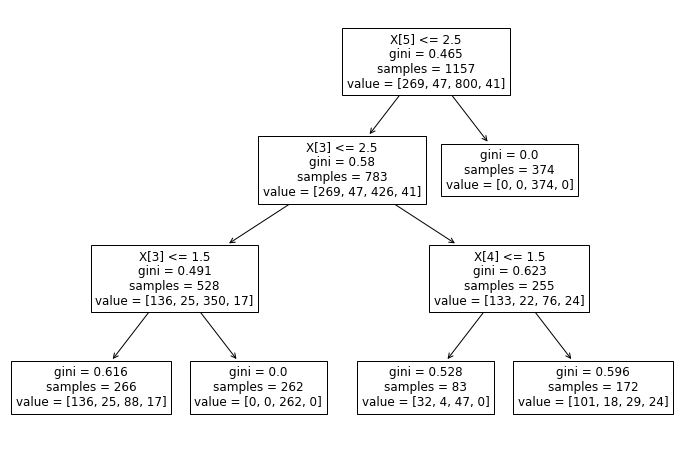

In [24]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

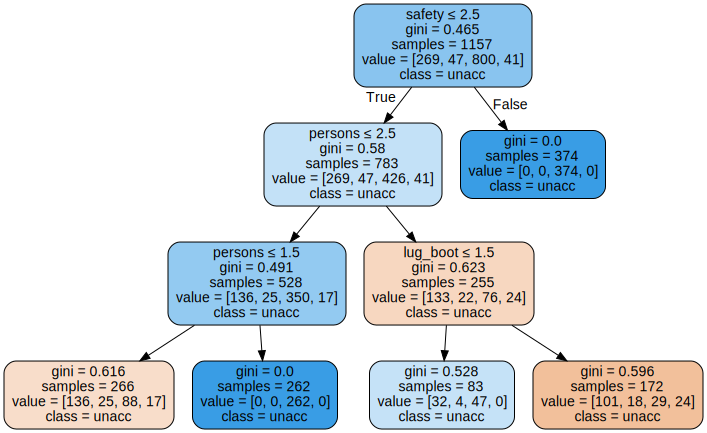

In [25]:
import graphviz

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

### 3.4 Decision Tree Classifier with criterion entropy

In [26]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

**Predict the Test set results with criterion entropy**

In [27]:
y_pred_en = clf_en.predict(X_test)

**Check the accuracy score with criterion entropy**

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7758


**Compare the train-set and test-set accuracy**

In [29]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'acc'], dtype=object)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7416


**Check for overfitting and underfitting**

In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7416
Test set score: 0.7758


**Visualize decision-trees**

[Text(418.5, 380.52, 'X[5] <= 2.5\nentropy = 1.216\nsamples = 1157\nvalue = [269, 47, 800, 41]'),
 Text(334.8, 271.8, 'X[1] <= 2.5\nentropy = 1.474\nsamples = 783\nvalue = [269, 47, 426, 41]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.5\nentropy = 1.713\nsamples = 395\nvalue = [145, 47, 171, 32]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.631\nsamples = 127\nvalue = [73, 25, 17, 12]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.544\nsamples = 268\nvalue = [72, 22, 154, 20]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 3.5\nentropy = 1.05\nsamples = 388\nvalue = [124, 0, 255, 9]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.844\nsamples = 291\nvalue = [79, 0, 212, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.353\nsamples = 97\nvalue = [45, 0, 43, 9]'),
 Text(502.20000000000005, 271.8, 'entropy = 0.0\nsamples = 374\nvalue = [0, 0, 374, 0]')]

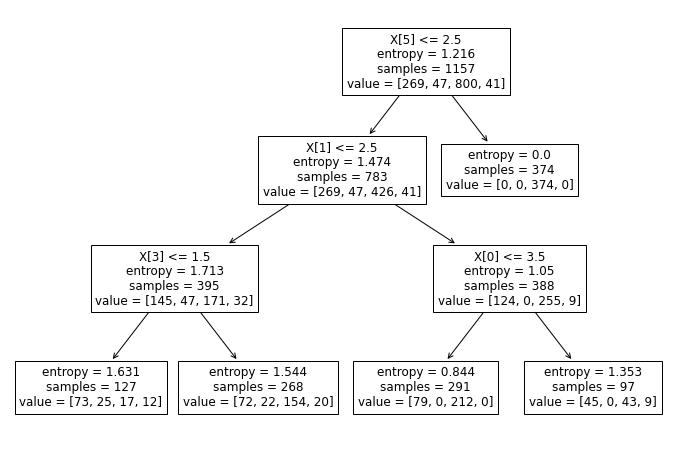

In [32]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 


**Visualize decision-trees with graphviz**

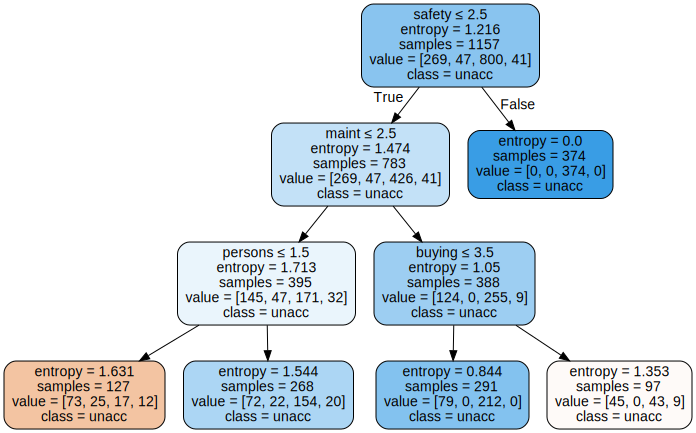

In [33]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called `Confusion matrix` that comes to our rescue.

## 4. Confusion matrix 

In [34]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 59   0  56   0]
 [ 11   0  11   0]
 [ 26   0 384   0]
 [ 16   0   8   0]]


### Classification Report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.51      0.52       115
        good       0.00      0.00      0.00        22
       unacc       0.84      0.94      0.88       410
       vgood       0.00      0.00      0.00        24

    accuracy                           0.78       571
   macro avg       0.34      0.36      0.35       571
weighted avg       0.71      0.78      0.74       571



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

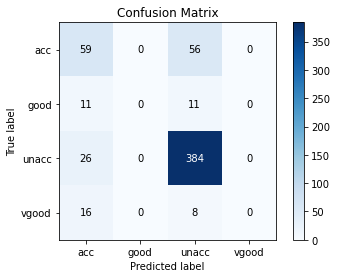

In [40]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test, y_pred_en)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

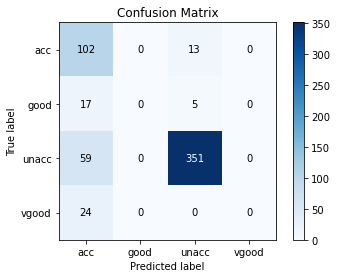

In [38]:
skplt.plot_confusion_matrix(y_test,y_pred_gini)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

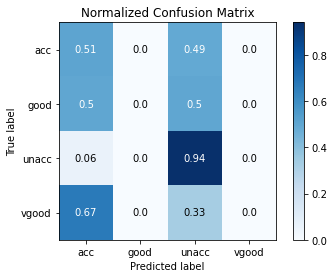

In [41]:
#Entropy criterion

skplt.plot_confusion_matrix(y_test, y_pred_en,normalize = True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

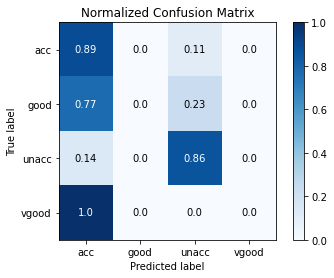

In [42]:
#Gini Index criterion
skplt.plot_confusion_matrix(y_test,y_pred_gini,normalize = True)